In [3]:
!pip install kaggle

In [5]:
!mkdir -p ~/.kaggle

In [7]:
!cp kaggle_89.json ~/.kaggle/

In [8]:
!chmod 600 ~/.kaggle/kaggle_89.json

In [11]:
!kaggle datasets download -d utkarshsaxenadn/car-vs-bike-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset
License(s): CC0-1.0
 95% 98.0M/103M [00:04<00:00, 23.4MB/s]
100% 103M/103M [00:04<00:00, 24.5MB/s] 


In [12]:
import zipfile
zip_ref = zipfile.ZipFile('/content/car-vs-bike-classification-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter


import tensorflow as tf
import tensorflow.keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import save_img



from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping, ModelCheckpoint


from sklearn.metrics import confusion_matrix

In [14]:
file_path = '/content/Car-Bike-Dataset'

In [15]:
batch_size = 32
img_height = 256
img_width = 256

In [16]:


data_generator = ImageDataGenerator(rescale=1/255.,
                               rotation_range = 90,
                               width_shift_range = 0.1,
                               horizontal_flip = True,
                               vertical_flip = True,
                               validation_split = 0.2)



In [17]:
train_set = data_generator.flow_from_directory(file_path,
                               class_mode = 'binary',
                               target_size = (img_height,img_width),
                               shuffle = True,
                               batch_size = batch_size,
                               subset = 'training')

Found 3200 images belonging to 2 classes.


In [18]:
test_set = data_generator.flow_from_directory(file_path,
                               class_mode = 'binary',
                               target_size = (img_height,img_width),
                               shuffle = False,
                               batch_size = batch_size,
                               subset = 'validation')

Found 800 images belonging to 2 classes.


In [19]:
num_classes = 1
model = Sequential([
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid' )

])

model.build(input_shape = (None,256,256,3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 average_pooling2d (Average  (None, 127, 127, 64)      0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 average_pooling2d_1 (Avera  (None, 62, 62, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [20]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [21]:
training_history = model.fit(
  train_set,
  validation_data=test_set,
  epochs=20,
  shuffle = True,
  batch_size = 32
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 20/100 [=====>........................] - ETA: 42s - loss: 0.8453 - accuracy: 0.5078

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 [==============================] - 80s 716ms/step - loss: 0.7137 - accuracy: 0.5478 - val_loss: 0.6629 - val_accuracy: 0.5788
Epoch 2/20
100/100 [==============================] - 72s 720ms/step - loss: 0.5973 - accuracy: 0.6891 - val_loss: 0.5865 - val_accuracy: 0.7000
Epoch 3/20
100/100 [==============================] - 71s 715ms/step - loss: 0.5325 - accuracy: 0.7453 - val_loss: 0.5631 - val_accuracy: 0.7212
Epoch 4/20
100/100 [==============================] - 69s 695ms/step - loss: 0.5004 - accuracy: 0.7484 - val_loss: 0.5581 - val_accuracy: 0.7050
Epoch 5/20
100/100 [==============================] - 71s 714ms/step - loss: 0.4725 - accuracy: 0.7856 - val_loss: 0.4710 - val_accuracy: 0.7812
Epoch 6/20
100/100 [==============================] - 71s 714ms/step - loss: 0.4419 - accuracy: 0.7959 - val_loss: 0.5702 - val_accuracy: 0.7175
Epoch 7/20
100/100 [==============================] - 79s 789ms/step - loss: 0.4212 - accuracy: 0.8050 - val_loss: 0.4569 - val_accuracy: 0.8

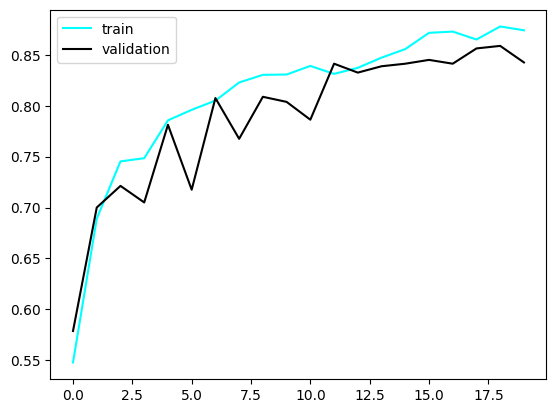

In [22]:
plt.plot(training_history.history['accuracy'], color = 'cyan', label='train')
plt.plot(training_history.history['val_accuracy'], color = 'black', label='validation')
plt.legend()
plt.show()